# The Spark Foundation Task-1

# Prediction using Supervised Machine Learning(Beginner)

Question:- What will be the predicted score if the student studied for 9.25hrs/day?

# Created by :- Shubham Ravindra Patil

# Step 1:- Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 2:- Reading data from csv file from Github

In [2]:
data=pd.read_csv(r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Lets check the shape of the data i.e Columns and Rows in Dataset

In [4]:
#here we got the shape of the dataset which contains 25 rows and 2 columns
data.shape

(25, 2)

Lets check the column name and its datatype

In [5]:
data.columns
#as we can see there are two columns Hours and Scores and Object as datatype

Index(['Hours', 'Scores'], dtype='object')

In [6]:
#lets check if there is some null values or not
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#lets describe our data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#lets see the information of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


From the above data we can conclude that there are not any null values present.

<Figure size 1440x1440 with 0 Axes>

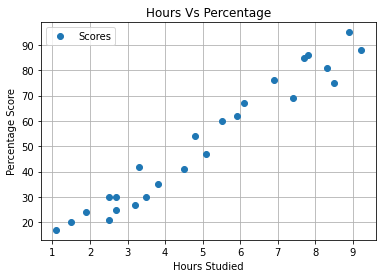

In [9]:
fig=plt.figure(figsize=(20,20))
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(True)

# Step 3:- Preparing the data so that we can apply the necessary ML model

In [10]:
X=data.iloc[:,:-1].values    #will take only first column i.e 'Hours' column which is Feature
y=data.iloc[:,1].values   #will take only last column i.e 'Scores'

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

As we have our data so now we will split this data into training and testing sets. For doing this we will be use 
scikit learn librarys built in train_test_split() method.

In [13]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Step 4:- Traning the model

In [14]:
lr=LinearRegression()
lr.fit(X_train,y_train)

print("Training completed sucessfully")

Training completed sucessfully


In [15]:
lr.predict(X_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [17]:
print("Coefficient :",lr.coef_)
print("Intercept :",lr.intercept_)

Coefficient : [9.91065648]
Intercept : 2.018160041434683


    Plotting the regression line by using Linear Regression y=m*x+c

In [18]:
line=lr.coef_*X+lr.intercept_

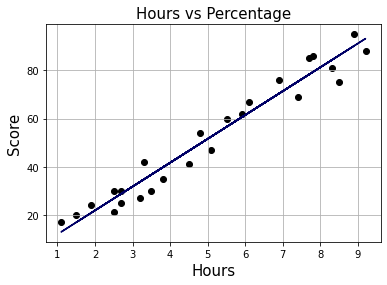

In [19]:
#plotting the regression line
plt.scatter(X,y,color='#000000')
plt.plot(X,line,color='#000066')
plt.title('Hours vs Percentage', fontsize=15)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.grid(True)
plt.show()

# Step 5:- Lets predict some values

In [20]:
#preedictinng scores
y_pred = lr.predict(X_test)

In [21]:
print(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [22]:
#Compare the actual and predicted scores
data1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
#Lets check the output by putting random values
n = float(input("Enter no of hours o=per day:- "))
pre = lr.predict([[n]])
print(f"If the number of hours studied are {n}.\nThe Predicted score is {pre[0]}")

Enter no of hours o=per day:- 7
If the number of hours studied are 7.0.
The Predicted score is 71.39275540593034


In [25]:
n = float(input("Enter no of hours o=per day:- "))
pre1 = lr.predict([[n]])
print(f"If the number of hours studied are {n}.\nThe Predicted score is {pre1[0]}")

Enter no of hours o=per day:- 9.25
If the number of hours studied are 9.25.
The Predicted score is 93.69173248737538


# Step 6:- Evaluating the model

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

4.6474476121003665

# Step 7:- Solution
What will be predicted score if a student studies for 9.25hrs/day?

In [27]:
print(f"If number of hours studied are {9.25} a day then, \nthe Predicted Score is {pre1[0]} approximately.")

If number of hours studied are 9.25 a day then, 
the Predicted Score is 93.69173248737538 approximately.


# Predicted score = 93.69173248737538